Load Neccesary library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import Sequential,layers

Load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [3]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

[19]


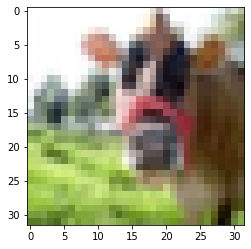

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

Create a deep learning model withh 5 hidden layers. analyse data and figure out configuration of input and output layer. 

In [ ]:

model = Sequential([
    layers.Flatten(),
    layers.Dense(1024,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512,activation="relu"),
    layers.Dense(256,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256,activation="relu"),
    layers.Dense(100,activation="softmax")
])

model.compile(
    metrics=["accuracy"],optimizer="adam",
    loss="categorical_crossentropy"
)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,batch_size=100)

Epoch 1/500
500/500 [==============================] - 3s 5ms/step - loss: 4.4880 - accuracy: 0.0211 - val_loss: 4.2144 - val_accuracy: 0.0458
Epoch 2/500
500/500 [==============================] - 2s 4ms/step - loss: 4.1405 - accuracy: 0.0555 - val_loss: 4.0222 - val_accuracy: 0.0686
Epoch 3/500
500/500 [==============================] - 2s 4ms/step - loss: 4.0143 - accuracy: 0.0700 - val_loss: 3.9143 - val_accuracy: 0.0844
Epoch 4/500
500/500 [==============================] - 2s 4ms/step - loss: 3.9282 - accuracy: 0.0843 - val_loss: 3.8732 - val_accuracy: 0.0913
Epoch 5/500
500/500 [==============================] - 2s 4ms/step - loss: 3.8703 - accuracy: 0.0935 - val_loss: 3.8184 - val_accuracy: 0.1039
Epoch 6/500
500/500 [==============================] - 2s 5ms/step - loss: 3.8191 - accuracy: 0.1016 - val_loss: 3.7767 - val_accuracy: 0.1101
Epoch 7/500
500/500 [==============================] - 2s 4ms/step - loss: 3.7815 - accuracy: 0.1075 - val_loss: 3.7160 - val_accuracy: 0.1290

Test your model with test data.

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.6464 - accuracy: 0.1684


[3.6464219093322754, 0.16840000450611115]

Text(0, 0.5, 'loss')

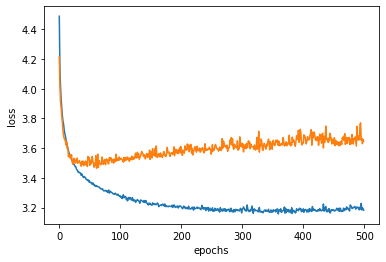

In [ ]:
plt.plot(list(range(500)),history.history["loss"])
plt.plot(list(range(500)),history.history["val_loss"])

plt.xlabel("epochs")
plt.ylabel("loss")

Create a model with 5 convolution layer. 

In [ ]:
model = Sequential([
    # CNN Layers
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # ANN layers
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(150,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(250,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(100,activation="softmax")

])

model.compile(
    optimizer = "rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [5]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 100)
y_test_cat = tf.keras.utils.to_categorical(y_test, 100)
x_train_norm = x_train.astype('float32')/255.0
x_test_norm = x_test.astype("float32")/255.0

In [ ]:
history = model.fit(x_train_norm,y_train_cat,validation_data=(x_test_norm,y_test_cat),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 8ms/step - loss: 4.1604 - accuracy: 0.0558 - val_loss: 3.8404 - val_accuracy: 0.1085
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 3.6251 - accuracy: 0.1340 - val_loss: 3.5139 - val_accuracy: 0.1588
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 3.3439 - accuracy: 0.1842 - val_loss: 3.1538 - val_accuracy: 0.2309
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 3.1680 - accuracy: 0.2241 - val_loss: 3.0330 - val_accuracy: 0.2563
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 3.0558 - accuracy: 0.2471 - val_loss: 3.2748 - val_accuracy: 0.2204
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.9784 - accuracy: 0.2640 - val_loss: 2.9298 - val_accuracy: 0.2808
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.9437 - accuracy: 0.2763 - val_loss: 2.8841 - val_ac

Test your model with testing data.

In [ ]:
model.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 2.9705 - accuracy: 0.2667


[2.9704654216766357, 0.26669999957084656]

Text(0, 0.5, 'loss')

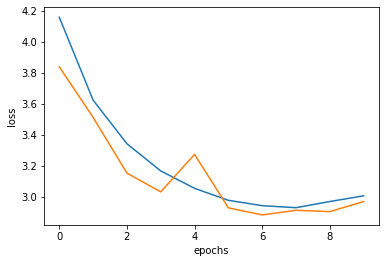

In [ ]:
plt.plot(list(range(10)),history.history["loss"])
plt.plot(list(range(10)),history.history["val_loss"])

plt.xlabel("epochs")
plt.ylabel("loss")

Find best lerning rate decay mechanism test given four methods and find the best mechnism for your problem.

1. linear learning rate decay
2. exponential learning rate decay
3. step wise decay function
4. Cyclical learning rates(Trigular method)


In [23]:
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([
    # CNN Layers
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # ANN layers
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(150,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(250,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(100,activation="softmax")

])


In [14]:
# Step Decay Decay
import math

class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get("loss"))
       self.lr.append(step_decay(len(self.losses)))


def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)

In [15]:
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]
history = model.fit(x_train_norm, y_train_cat, 
   validation_data=(x_test_norm, y_test_cat), 
   epochs=10, 
   callbacks=callbacks_list, 
   verbose=2)

Epoch 1/10
1563/1563 - 9s - loss: 276705.3750 - accuracy: 0.0102 - val_loss: 4.6407 - val_accuracy: 0.0100 - lr: 0.1000 - 9s/epoch - 6ms/step
Epoch 2/10
1563/1563 - 9s - loss: 4.6481 - accuracy: 0.0104 - val_loss: 4.6503 - val_accuracy: 0.0100 - lr: 0.1000 - 9s/epoch - 6ms/step
Epoch 3/10
1563/1563 - 9s - loss: 4.6493 - accuracy: 0.0107 - val_loss: 4.6551 - val_accuracy: 0.0100 - lr: 0.1000 - 9s/epoch - 6ms/step
Epoch 4/10
1563/1563 - 9s - loss: 4.6481 - accuracy: 0.0102 - val_loss: 4.6468 - val_accuracy: 0.0100 - lr: 0.1000 - 9s/epoch - 6ms/step
Epoch 5/10
1563/1563 - 9s - loss: 4.6486 - accuracy: 0.0092 - val_loss: 4.6456 - val_accuracy: 0.0100 - lr: 0.1000 - 9s/epoch - 6ms/step
Epoch 6/10
1563/1563 - 9s - loss: 4.6504 - accuracy: 0.0097 - val_loss: 4.6533 - val_accuracy: 0.0100 - lr: 0.1000 - 9s/epoch - 6ms/step
Epoch 7/10
1563/1563 - 9s - loss: 4.6490 - accuracy: 0.0103 - val_loss: 4.6503 - val_accuracy: 0.0100 - lr: 0.1000 - 9s/epoch - 6ms/step
Epoch 8/10
1563/1563 - 8s - loss: 4.

In [17]:
# Exponential Decay

initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)
    
# Fit the model to the training data
history_exp_decay = model.fit(
    x_train_norm, 
    y_train_cat, 
    epochs=10, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
625/625 [==============================] - 7s 9ms/step - loss: 4.6154 - accuracy: 0.0095 - val_loss: 4.6107 - val_accuracy: 0.0087 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009048374180359595.
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 4.6086 - accuracy: 0.0089 - val_loss: 4.6103 - val_accuracy: 0.0087 - lr: 0.0090

Epoch 3: LearningRateScheduler setting learning rate to 0.008187307530779819.
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 4.6082 - accuracy: 0.0093 - val_loss: 4.6096 - val_accuracy: 0.0077 - lr: 0.0082

Epoch 4: LearningRateScheduler setting learning rate to 0.007408182206817179.
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 4.6081 - accuracy: 0.0104 - val_loss: 4.6075 - val_accuracy: 0.0105 - lr: 0.0074

Epoch 5: LearningRateScheduler setting learning rate to 0.006703200460356393.
E

In [20]:
# Cyclic Learning Rates
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 27.9 MB/s 


In [21]:
import tensorflow_addons as tfa
BATCH_SIZE = 64
EPOCHS = 10
INIT_LR = 1e-4
MAX_LR = 1e-2

steps_per_epoch = len(x_train) // BATCH_SIZE
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    scale_fn=lambda x: 1/(2.**(x-1)),
    step_size=2 * steps_per_epoch
)
optimizer = tf.keras.optimizers.SGD(clr)

In [24]:
model.compile(
    optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"]
)

In [26]:
model.build()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [27]:
model.fit(x_train_norm,y_train_cat,batch_size=BATCH_SIZE,epochs=10)

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 4.6209 - accuracy: 0.0118
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 4.5672 - accuracy: 0.0184
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 4.4494 - accuracy: 0.0323
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 4.3525 - accuracy: 0.0382
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 4.3275 - accuracy: 0.0430
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 4.3007 - accuracy: 0.0439
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 4.2416 - accuracy: 0.0511
Epoch 8/10
782/782 [==============================] - 7s 9ms/step - loss: 4.1950 - accuracy: 0.0593
Epoch 9/10
782/782 [==============================] - 6s 8ms/step - loss: 4.1824 - accuracy: 0.0601
Epoch 10/10
782/782 [==============================] - 6s 8ms/step - loss: 4.1626 - accuracy: 0.0639